# Understanding TFT

## Libraries and Drive

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir('/content/drive/My Drive/Volatility_forecasting/')

Mounted at /content/drive


In [ ]:
!pip install neuralforecast ruptures dask[dataframe] scikit-learn
import os
os.environ['NIXTLA_ID_AS_COL'] = '1'

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.2/259.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4

## QLIKE over time Horizon 10 TFT models

Following the visualiation techniques and metric calculations from Suoto and Moradi 2024

https://www.emerald.com/insight/content/doi/10.1108/cfri-01-2024-0032/full/html

https://github.com/hugogobato/Can-Transformers-Transform-Financial-Forecasting-

In [ ]:
df = pd.read_csv('Data/Test/horizon_10/Tech_Firm_AutoTFT_model0_1_sub_horizon_10.csv')
df = df.drop_duplicates(subset=['ds', 'unique_id'])
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401555 entries, 0 to 401554
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   unique_id        401555 non-null  object        
 1   ds               401555 non-null  datetime64[ns]
 2   y                401555 non-null  float64       
 3   AutoTFT          401555 non-null  float64       
 4   AutoTFT1         401555 non-null  float64       
 5   AutoFirmAutoTFT  401555 non-null  float64       
 6   AutoTechAutoTFT  401555 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 21.4+ MB


In [ ]:
AutoTFT0 = df[['AutoTFT', 'unique_id','ds']]
AutoTFT0 = AutoTFT0.pivot(index='ds', columns='unique_id', values='AutoTFT')
AutoTFT1 = df[['AutoTFT1', 'unique_id','ds']]
AutoTFT1 = AutoTFT1.pivot(index='ds', columns='unique_id', values='AutoTFT1')
AutoFirmAutoTFT = df[['AutoFirmAutoTFT', 'unique_id','ds']]
AutoFirmAutoTFT = AutoFirmAutoTFT.pivot(index='ds', columns='unique_id', values='AutoFirmAutoTFT')
AutoTechAutoTFT = df[['AutoTechAutoTFT', 'unique_id','ds']]
AutoTechAutoTFT = AutoTechAutoTFT.pivot(index='ds', columns='unique_id', values='AutoTechAutoTFT')

Actuals = df[['y', 'ds', 'unique_id']]
Actuals = Actuals.pivot(index='ds', columns='unique_id', values='y')

### TFT 0

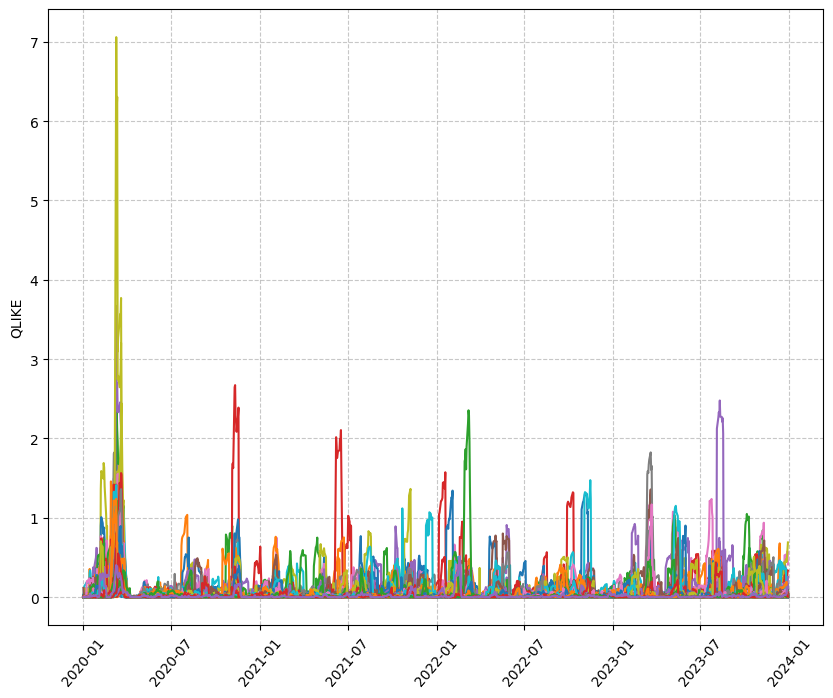

In [ ]:
import matplotlib.pyplot as plt

AutoTFT0_QLIKE = (Actuals / AutoTFT0) - np.log(Actuals / AutoTFT0) - 1


plt.figure(figsize=(10, 8))
plt.plot(AutoTFT0_QLIKE)

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel("QLIKE")
#plt.title("TFT0 QLIKE over time")
plt.xticks(rotation=50)
plt.show()

### TFT Firm

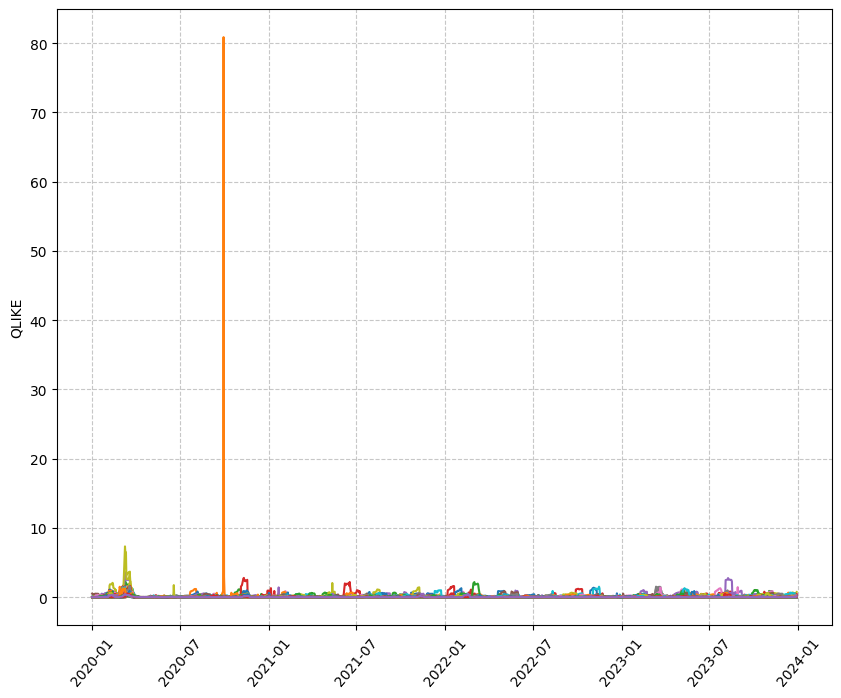

In [ ]:
import matplotlib.pyplot as plt
AutoFirmAutoTFT_QLIKE = (Actuals / AutoFirmAutoTFT) - np.log(Actuals / AutoFirmAutoTFT) - 1


plt.figure(figsize=(10, 8))
plt.plot(AutoFirmAutoTFT_QLIKE)

plt.grid(True, linestyle='--', alpha=0.7)

plt.ylabel("QLIKE")
#plt.title("FirmTFT QLIKE over time")
plt.xticks(rotation=50)
plt.show()

Top 5 outliers TFT firm

In [ ]:
AutoFirmAutoTFT_long = AutoFirmAutoTFT_QLIKE.stack().reset_index()
AutoFirmAutoTFT_long.columns = ["ds", "unique_id", "FirmTFT"]
highest_FirmTFT = AutoFirmAutoTFT_long.nlargest(5, "FirmTFT")
highest_FirmTFT

,ds,unique_id,FirmTFT
74841,2020-09-29,FIRSTENERGY,80.877906
18748,2020-03-09,ONEOK,7.327648
19518,2020-03-11,ONEOK,6.469970
19133,2020-03-10,ONEOK,6.152802
21588,2020-03-19,APA,3.686261


#### Filtered TFT Firm

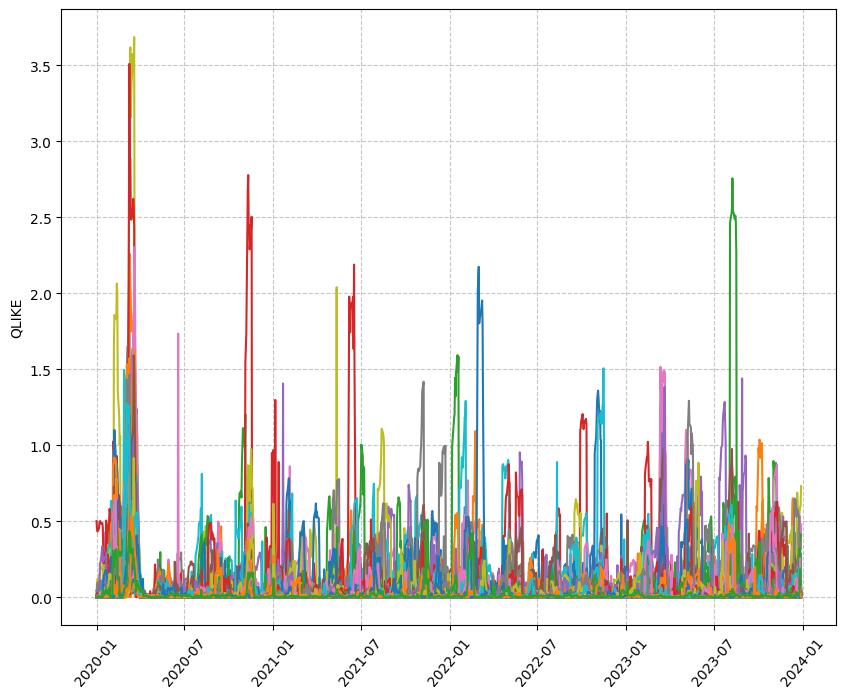

In [ ]:
import matplotlib.pyplot as plt

unique_ids_to_drop = AutoFirmAutoTFT_long.nlargest(3, "FirmTFT")["unique_id"]
filtered_FirmTFT = AutoFirmAutoTFT_long[~AutoFirmAutoTFT_long["unique_id"].isin(unique_ids_to_drop)]
filtered_FirmTFT = filtered_FirmTFT.pivot(index='ds', columns='unique_id', values='FirmTFT')


plt.figure(figsize=(10, 8))
plt.plot(filtered_FirmTFT)

plt.grid(True, linestyle='--', alpha=0.7)


plt.ylabel("QLIKE")
#plt.title("Filtered Firm TFT QLIKE over time")
plt.xticks(rotation=50)
plt.show()

### TFT Tech

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


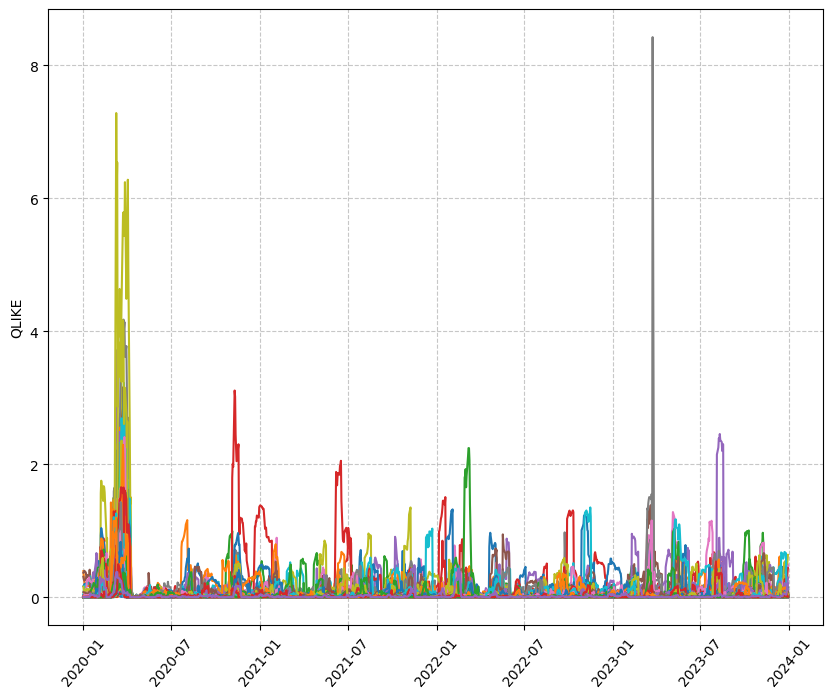

In [ ]:
import matplotlib.pyplot as plt

AutoTechAutoTFT_QLIKE = (Actuals / AutoTechAutoTFT) - np.log(Actuals / AutoTechAutoTFT) - 1


plt.figure(figsize=(10, 8))
plt.plot(AutoTechAutoTFT_QLIKE)

plt.grid(True, linestyle='--', alpha=0.7)

plt.ylabel("QLIKE")
#plt.title("TechTFT QLIKE over time")
plt.xticks(rotation=50)
plt.show()

### TFT1

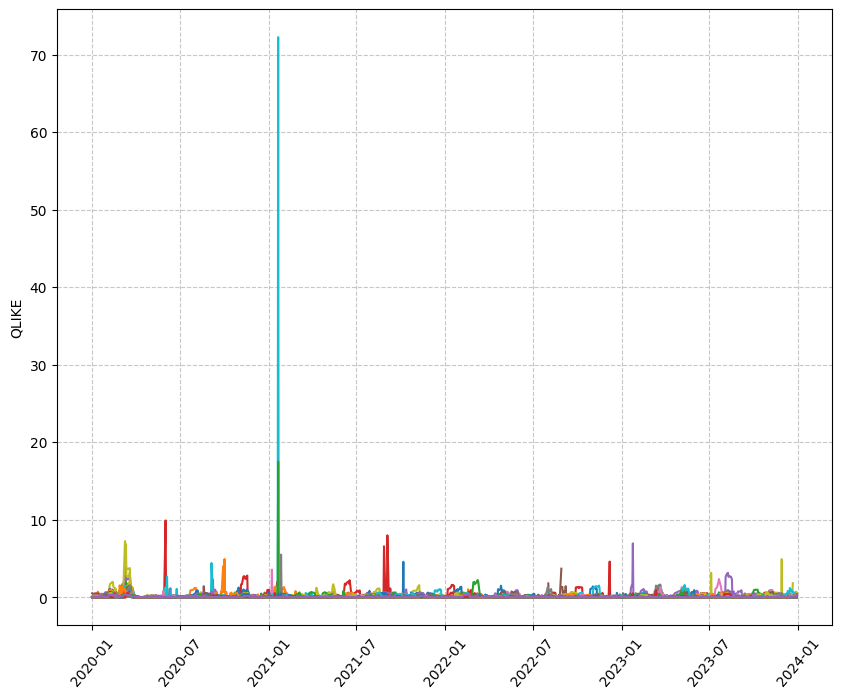

In [ ]:
import matplotlib.pyplot as plt

AutoTFT1_QLIKE = (Actuals / AutoTFT1) - np.log(Actuals / AutoTFT1) - 1



plt.figure(figsize=(10, 8))
plt.plot(AutoTFT1_QLIKE)

plt.grid(True, linestyle='--', alpha=0.7)


plt.ylabel("QLIKE")
#plt.title("TFT1 QLIKE over time")
plt.xticks(rotation=50)
plt.show()

Outliers TFT1

In [ ]:
AutoTFT1_long = AutoTFT1_QLIKE.stack().reset_index()
AutoTFT1_long.columns = ["ds", "unique_id", "TFT1"]
highest_TFT1 = AutoTFT1_long.nlargest(5, "TFT1")
highest_TFT1

,ds,unique_id,TFT1
106041,2021-01-20,HOST HOTELS & RESORTS REIT,72.244370
103223,2021-01-11,BIOGEN,31.799478
106164,2021-01-20,REGIONS FINL.NEW,17.472375
41711,2020-06-01,EQUINIX REIT,9.889591
168281,2021-09-03,BIOGEN,7.969691


Lowest average QLIKE per company top 5

In [ ]:
# Calculate the average value across the three models for each unique_id and metric
AutoTFT1_long['Value'] = AutoTFT1_long[['TFT1']].mean(axis=1)
average_df = AutoTFT1_long[['unique_id', 'Value']]
final_df = average_df.groupby('unique_id')['Value'].mean().reset_index()
top_5_lowest = final_df.nsmallest(5, 'Value')
top_5_lowest

,unique_id,Value
131,EQT,0.008518
156,FREEPORT-MCMORAN,0.010943
142,EXXON MOBIL,0.011748
102,COTERRA ENERGY,0.012096
237,MICROSOFT,0.012370


#### Filtered TFT1

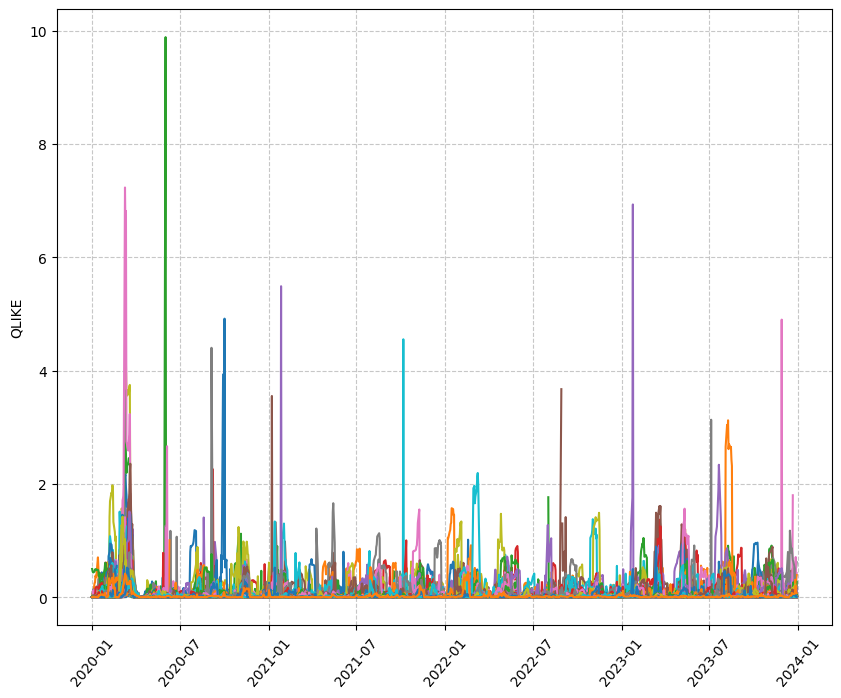

In [ ]:
import matplotlib.pyplot as plt

unique_ids_to_drop = AutoTFT1_long.nlargest(3, "TFT1")["unique_id"]
filtered_TFT1 = AutoTFT1_long[~AutoTFT1_long["unique_id"].isin(unique_ids_to_drop)]
filtered_TFT1 = filtered_TFT1.pivot(index='ds', columns='unique_id', values='TFT1')


plt.figure(figsize=(10, 8))
plt.plot(filtered_TFT1)

plt.grid(True, linestyle='--', alpha=0.7)

plt.ylabel("QLIKE")
#plt.title("Filtered TFT1 QLIKE over time")
plt.xticks(rotation=50)
plt.show()

## Companies with Lowest Average QLIKE and Outliers of TFT1 H=10

In [ ]:
Y_train_df = pd.read_csv('Data/S&P500/3ProSP500.csv')
Y_train_df['ds'] = pd.to_datetime(Y_train_df['ds'])
Y_train_df = Y_train_df[['unique_id', 'ds', '840E']]
Y_train_df = Y_train_df.rename(columns={'840E': 'y'})
unique_ids_to_keep = ['EQT', 'FREEPORT-MCMORAN', 'HOST HOTELS & RESORTS REIT', 'BIOGEN']
Y_train_df = Y_train_df[Y_train_df['unique_id'].isin(unique_ids_to_keep)]
Y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20868 entries, 276501 to 939059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  20868 non-null  object        
 1   ds         20868 non-null  datetime64[ns]
 2   y          20868 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 652.1+ KB


In [ ]:
df = pd.read_csv('Data/Test/horizon_10/bitcn_tide_tft_nhits_model0_1_full_horizon_10.csv')
df = df.sort_values(by=['unique_id', 'ds'])
df['ds'] = pd.to_datetime(df['ds'])
unique_ids_to_keep = ['EQT', 'FREEPORT-MCMORAN', 'HOST HOTELS & RESORTS REIT', 'BIOGEN']
df = df[df['unique_id'].isin(unique_ids_to_keep)]
df

,unique_id,ds,cutoff,AutoBiTCN,AutoBiTCN-median,AutoBiTCN-lo-90,AutoBiTCN-hi-90,AutoBiTCN1,AutoBiTCN1-median,AutoBiTCN1-lo-90,...,AutoTFT1-lo-90,AutoTFT1-hi-90,AutoNHITS,AutoNHITS-median,AutoNHITS-lo-90,AutoNHITS-hi-90,AutoNHITS1,AutoNHITS1-median,AutoNHITS1-lo-90,AutoNHITS1-hi-90
548020,BIOGEN,2020-01-01,2019-12-31,0.2122,0.2126,0.1488,0.2740,0.2103,0.2106,0.1764,...,0.13070,0.3152,0.2134,0.2129,0.1992,0.2266,0.21530,0.21280,0.15210,0.2800
548021,BIOGEN,2020-01-02,2019-12-31,0.2056,0.2047,0.1417,0.2730,0.2069,0.2065,0.1646,...,0.11304,0.3245,0.2097,0.2104,0.1222,0.2932,0.22240,0.22180,0.13830,0.2990
548030,BIOGEN,2020-01-02,2020-01-01,0.2194,0.2156,0.1531,0.2966,0.1954,0.1930,0.1512,...,0.13110,0.3010,0.2098,0.2097,0.1927,0.2270,0.21810,0.21830,0.15160,0.2832
548022,BIOGEN,2020-01-03,2019-12-31,0.2032,0.2036,0.1282,0.2766,0.2084,0.2081,0.1542,...,0.08530,0.3352,0.2075,0.2052,0.1337,0.2790,0.09937,0.10004,-0.05014,0.2245
548031,BIOGEN,2020-01-03,2020-01-01,0.2035,0.2042,0.1356,0.2740,0.1875,0.1884,0.1330,...,0.11800,0.2980,0.2058,0.2065,0.1443,0.2827,0.14530,0.14830,0.02220,0.2580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861188,HOST HOTELS & RESORTS REIT,2023-12-27,2023-12-14,0.2201,0.2179,0.1649,0.2754,0.2198,0.2210,0.1740,...,0.19780,0.2660,0.2297,0.2285,0.1621,0.2910,0.23720,0.23610,0.19370,0.2832
1861197,HOST HOTELS & RESORTS REIT,2023-12-27,2023-12-15,0.2240,0.2230,0.1709,0.2668,0.2302,0.2308,0.1918,...,0.19360,0.2600,0.2362,0.2365,0.1884,0.2886,0.23470,0.23510,0.19350,0.2751
1861189,HOST HOTELS & RESORTS REIT,2023-12-28,2023-12-14,0.2095,0.2181,0.1566,0.2740,0.2235,0.2241,0.1812,...,0.19860,0.2734,0.2273,0.2320,0.1648,0.2870,0.23510,0.23720,0.18130,0.2942
1861198,HOST HOTELS & RESORTS REIT,2023-12-28,2023-12-15,0.2262,0.2264,0.1750,0.2808,0.2314,0.2311,0.1876,...,0.19810,0.2727,0.2395,0.2383,0.1775,0.2966,0.23540,0.23610,0.19690,0.2760


In [ ]:
y_df_AutoTFT1 = df[['unique_id', 'ds', 'y', 'AutoTFT1', 'AutoTFT1-median', 'AutoTFT1-lo-90',  'AutoTFT1-hi-90']]
y_df_AutoTFT1

,unique_id,ds,y,AutoTFT1,AutoTFT1-median,AutoTFT1-lo-90,AutoTFT1-hi-90
548020,BIOGEN,2020-01-01,0.2096,0.2184,0.2189,0.13070,0.3152
548021,BIOGEN,2020-01-02,0.2095,0.2152,0.2142,0.11304,0.3245
548030,BIOGEN,2020-01-02,0.2095,0.2164,0.2164,0.13110,0.3010
548022,BIOGEN,2020-01-03,0.1835,0.2076,0.2050,0.08530,0.3352
548031,BIOGEN,2020-01-03,0.1835,0.2069,0.2123,0.11800,0.2980
...,...,...,...,...,...,...,...
1861188,HOST HOTELS & RESORTS REIT,2023-12-27,0.1978,0.2328,0.2336,0.19780,0.2660
1861197,HOST HOTELS & RESORTS REIT,2023-12-27,0.1978,0.2305,0.2322,0.19360,0.2600
1861189,HOST HOTELS & RESORTS REIT,2023-12-28,0.2145,0.2346,0.2341,0.19860,0.2734
1861198,HOST HOTELS & RESORTS REIT,2023-12-28,0.2145,0.2340,0.2330,0.19810,0.2727


In [ ]:
import random
import warnings
warnings.filterwarnings("ignore")
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

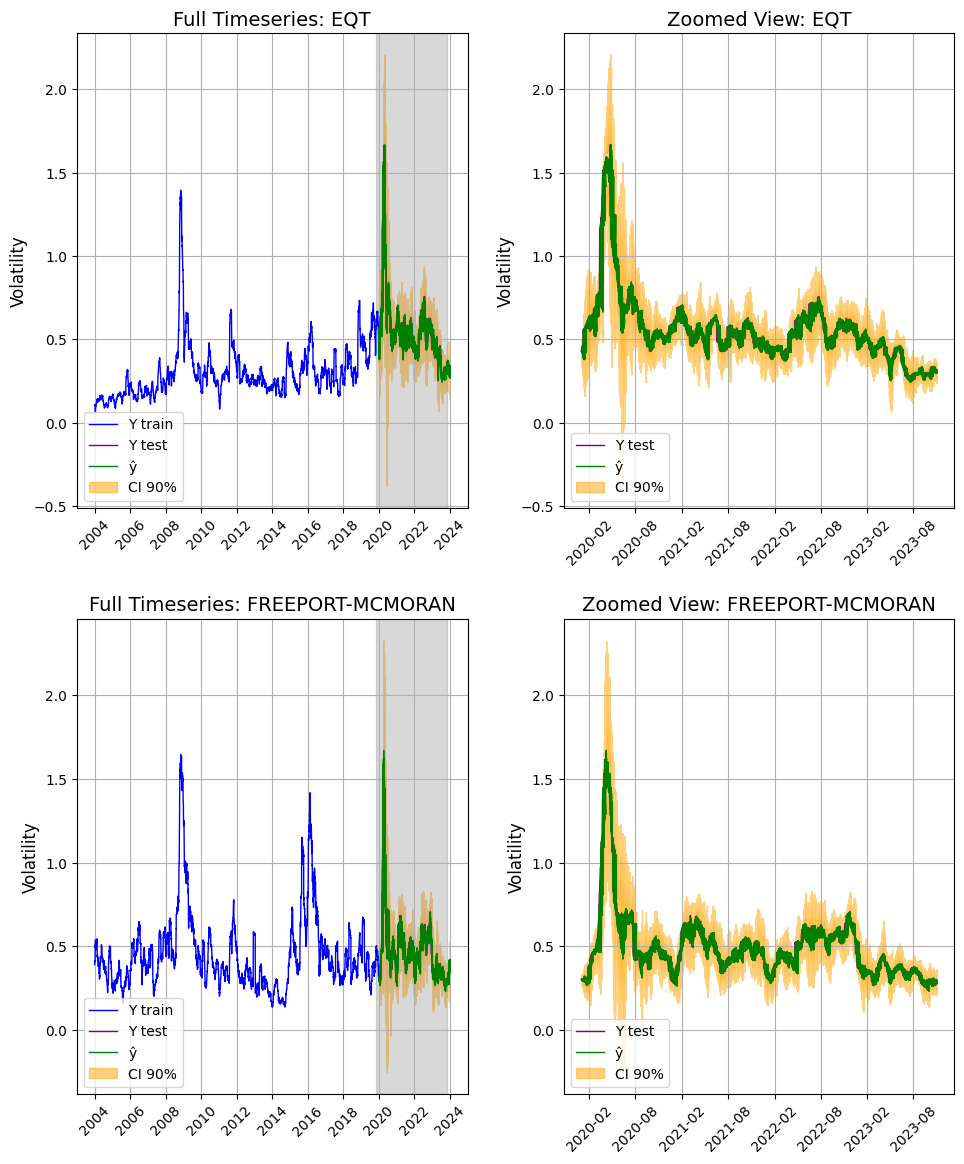

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_full_and_zoomed_labels(df_train, df_test, companies, model, level):
    fig, axes = plt.subplots(len(companies), 2, figsize=(10, 12))  # 2 columns, N rows (based on companies)

    for i, uid in enumerate(companies):
        # Full timeseries (Column 1)
        train_uid = df_train.query('unique_id == @uid')
        test_uid = df_test.query('unique_id == @uid')
        axes[i, 0].plot(train_uid['ds'], train_uid['y'], label='Y train', color='blue', linewidth=1)
        axes[i, 0].plot(test_uid['ds'], test_uid['y'], label='Y test', color='purple', linewidth=1)
        axes[i, 0].plot(test_uid['ds'], test_uid[f'{model}-median'], label='ŷ', color='green', linewidth=1)
        for l, alpha in zip(level, [0.5, 0.3]):
            axes[i, 0].fill_between(
                test_uid['ds'],
                test_uid[f'{model}-lo-{l}'],
                test_uid[f'{model}-hi-{l}'],
                color='orange',
                alpha=alpha,
                label=f'CI {l}%' if l == level[-1] else None  # Only one label for confidence interval
            )
        axes[i, 0].set_title(f"Full Timeseries: {uid}", fontsize=14)
        axes[i, 0].set_ylabel('Volatility', fontsize=12)
        axes[i, 0].xaxis.set_major_locator(mdates.YearLocator(2))
        axes[i, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        axes[i, 0].grid(True)
        axes[i, 0].legend(
            loc='lower left',  # Set legend in the bottom left corner
            fontsize=10,
            frameon=True
        )

        # Remove x-axis label
        axes[i, 0].set_xlabel("")

        # Zoomed-in plot (Column 2)
        zoom_start = '2019-11-01'  # Start date for zoom
        zoom_end = '2023-11-01'    # End date for zoom
        test_uid_zoom = test_uid.query('ds >= @zoom_start and ds <= @zoom_end')

        axes[i, 1].plot(test_uid_zoom['ds'], test_uid_zoom['y'], label='Y test', color='purple', linewidth=1)
        axes[i, 1].plot(test_uid_zoom['ds'], test_uid_zoom[f'{model}-median'], label='ŷ', color='green', linewidth=1)
        for l, alpha in zip(level, [0.5, 0.3]):
            axes[i, 1].fill_between(
                test_uid_zoom['ds'],
                test_uid_zoom[f'{model}-lo-{l}'],
                test_uid_zoom[f'{model}-hi-{l}'],
                color='orange',
                alpha=alpha,
                label=f'CI {l}%' if l == level[-1] else None  # Only one label for confidence interval
            )
        axes[i, 1].set_title(f"Zoomed View: {uid}", fontsize=14)
        axes[i, 1].set_ylabel('Volatility', fontsize=12)
        axes[i, 1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
        axes[i, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.setp(axes[i, 1].xaxis.get_majorticklabels(), rotation=45)
        axes[i, 1].grid(True)
        axes[i, 1].legend(
            loc='lower left',  # Set legend in the bottom left corner
            fontsize=10,
            frameon=True
        )

        # Remove x-axis label
        axes[i, 1].set_xlabel("")

        # Highlight relationship with a rectangle in the full graph
        axes[i, 0].axvspan(zoom_start, zoom_end, color='gray', alpha=0.3, label='Zoomed Region')

        # Rotate x-axis labels
        plt.setp(axes[i, 0].xaxis.get_majorticklabels(), rotation=45)
        plt.setp(axes[i, 1].xaxis.get_majorticklabels(), rotation=45)

    # Adjust layout
    fig.tight_layout(pad=2.0)
    plt.show()

# Example usage
companies = ['EQT', 'FREEPORT-MCMORAN']
plot_full_and_zoomed_labels(Y_train_df, y_df_AutoTFT1, companies, 'AutoTFT1', [90])

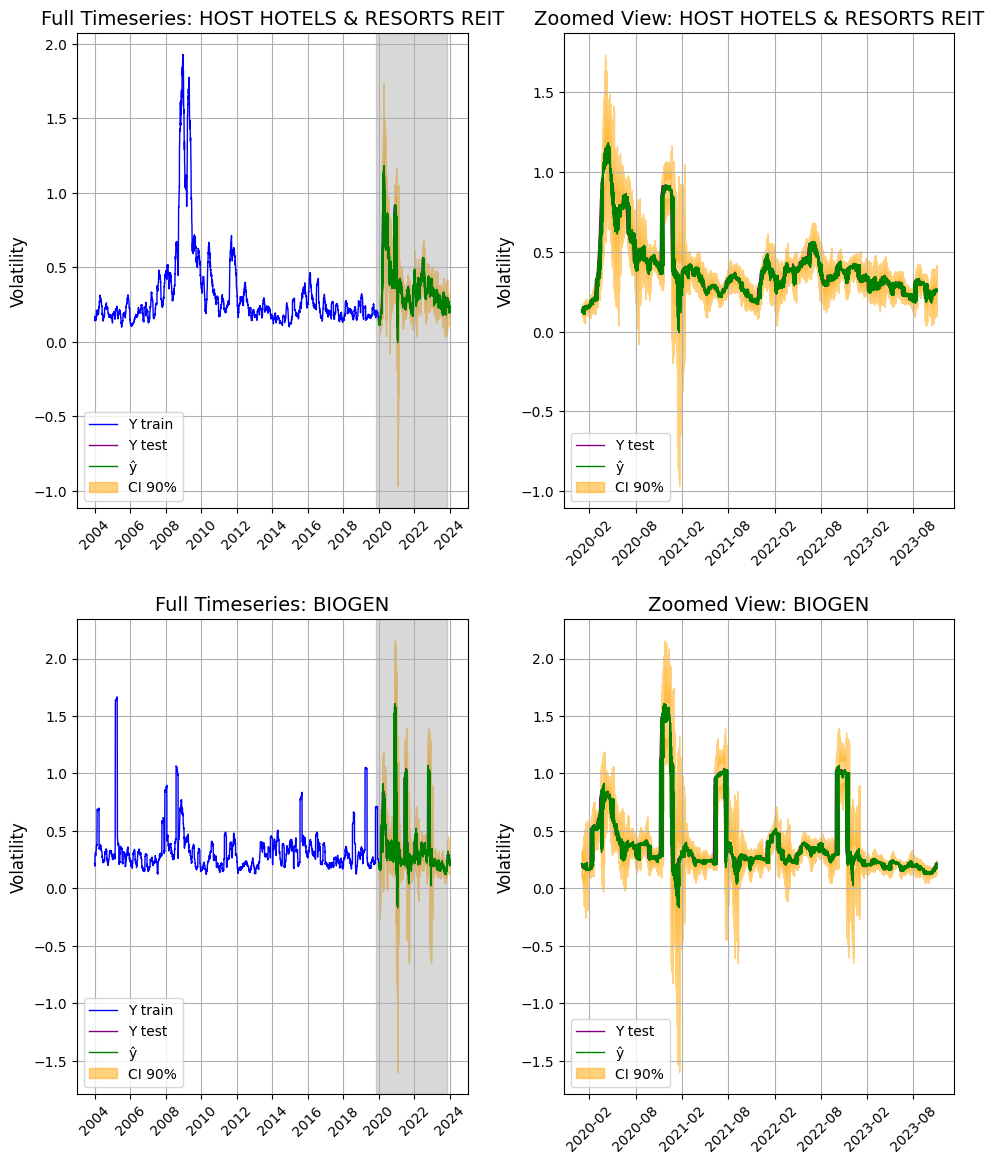

In [ ]:
companies = ['HOST HOTELS & RESORTS REIT', 'BIOGEN']  # Only two companies
plot_full_and_zoomed_labels(Y_train_df, y_df_AutoTFT1, companies, 'AutoTFT1', [90])